In [4]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

# All together

In [1]:
from experiment_tools_SA import SentimentAnalysis
import pandas as pd
from gensim.models import Word2Vec

w2v_model = Word2Vec.load("models/movies_w2v_100.model")

# ---- Leemos los mensajes ----
df = pd.read_pickle("corpora/movie-reviews/train-reduced.pickle")
display(df.sample(3))

2022-10-18 12:45:19.672846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64
2022-10-18 12:45:19.672868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 12:45:21.131950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 12:45:21.132294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64
2022-10-18 12:45:21.132374: W tensorflow/stream_executor/platform/default/dso_lo

,PhraseId,SentenceId,Phrase,Sentiment,tokens,clean text,Normalized Label
1339,28920,1340,Becomes the last thing you would expect from a...,1,"[becomes, last, thing, would, expect, film, ti...",becomes last thing would expect film title ind...,-0.5
6424,120348,6434,Not so much farcical as sour .,1,"[much, farcical, sour]",much farcical sour,-0.5
7889,145457,7903,Go .,2,[go],go,0.0


In [2]:
hpd = {'emb_model': w2v_model}

sa = SentimentAnalysis(hyper_params_dict=hpd,
                        df=df,
                        text_col_name='clean text',
                        label_col_name='Sentiment',
                        )

Dataframe contains entries with 5 labels:
[0 1 2 3 4]


In [3]:
p_dict = {
                'beta1': 0.5,
                'beta2': 2,
                'n_cols': 5,
                'alpha': 0.9,
                'top_n': 100,
                'n_iter': 3
                }

sa.run(combination_dict=p_dict,
        model=w2v_model)

Calculando palabras prototípicas... 

/home/wini/Repositorios/SA-paper/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SA-paper/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SA-paper/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SA-paper/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_inde

done in 523.80784
Construyendo vecinos... done in 2.75962
Calculando puntajes... done in 4.27802
Calculando representaciones... done in 2.65638
Entrenando clasificador... 

2022-10-18 12:54:15.673853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


67/67 [==============================] - 0s 3ms/step - loss: 1.2506 - accuracy: 0.4177
done in 14.02998
Iteración 1/3 completada.
Construyendo vecinos... done in 3.53244
Calculando puntajes... done in 4.28504
Calculando representaciones... done in 2.7143
67/67 [==============================] - 0s 3ms/step - loss: 1.0361 - accuracy: 0.5176
done in 17.04676
Iteración 2/3 completada.
Construyendo vecinos... done in 3.50404
Calculando puntajes... done in 4.27345
Calculando representaciones... done in 2.72948
67/67 [==============================] - 0s 2ms/step - loss: 0.8899 - accuracy: 0.6029
done in 13.38652
Iteración 3/3 completada.
Accuracy: 0.602906704172527
Recall: 0.6177094630111737
Precision: 0.6891799820595832


{'test_loss': 0.8898845314979553,
 'test_accuracy': 0.6029067039489746,
 'predictions': array([1, 0, 2, ..., 3, 3, 0])}

In [ ]:
betas1 = [0.5,2] #np.linspace(0.1,2,5)
betas2 = [0.5,2] #np.linspace(0.5,5,5)
nums_cols = [3,5,7]
alphas = [0.75,0.9]#np.linspace(0.25,0.98,5)
n_iters = [3,4]
tops_n = [50,100]

params_dict = {
                'beta1':betas1,
                'beta2':betas2,
                'n_cols':nums_cols,
                'alpha':alphas
                }

dpd = {
                'beta1': 1,
                'beta2': 1,
                'n_cols': 5,
                'alpha': 0.5,
                'top_n': 50,
                'n_iter': 3
                }

sa.grid_search(param_dict=params_dict,
                default_params_dict=dpd)

# Movie Reviews

## Preprocessing

In [2]:
df = pd.read_csv('corpora/movie-reviews/train.tsv',sep='\t')
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [8]:
labels = np.unique(df['Sentiment'].values)
print(labels)

[0 1 2 3 4]


In [ ]:
list(df[df['SentenceId']==1]['Phrase'].values)

In [13]:
sentence_ids = np.unique(df['SentenceId'].values)
final_idxs = []
for j in sentence_ids:
    sentences = list(df[df['SentenceId']==j]['Phrase'].values)
    idxs = df[df['SentenceId']==j].index.to_list()
    longest = sorted([(j,x) for j,x in enumerate(sentences)],key=lambda x:len(x[1]),reverse=True)[0]
    final_idxs.append(idxs[longest[0]])
df.loc[final_idxs]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1
...,...,...,...,...
155984,155985,8540,... either you 're willing to go with this cla...,2
155997,155998,8541,"Despite these annoyances , the capable Claybur...",2
156021,156022,8542,-LRB- Tries -RRB- to parody a genre that 's al...,1
156031,156032,8543,The movie 's downfall is to substitute plot fo...,1


In [15]:
reduced_df = df.loc[final_idxs].copy()
reduced_df.to_pickle('corpora/movie-reviews/train-reduced.pickle')

In [4]:
reduced_df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')

In [10]:
from TextCleaner import clean

reduced_df['tokens'] = reduced_df['Phrase'].apply(clean)
reduced_df.sample(5)


,PhraseId,SentenceId,Phrase,Sentiment,clean text
21973,21974,985,the filmmakers could dredge up,1,"[filmmaker, could, dredge]"
142250,142251,7718,"Impossible as it may sound , this film 's hear...",4,"[impossible, may, sound, film, heart, even, em..."
75514,75515,3872,But it does n't need Gangs of New York .,2,"[nt, need, gang, new, york]"
31337,31338,1466,To say that this vapid vehicle is downright do...,0,"[say, vapid, vehicle, downright, doltish, unev..."
81452,81453,4200,This is an exercise not in biography but in he...,1,"[exercise, biography, hero, worship]"


In [7]:
reduced_df.to_pickle('corpora/movie-reviews/train-reduced.pickle')

In [6]:
from gensim.models import Word2Vec

tokens_list = reduced_df['tokens'].values

dim = 100
W2V = Word2Vec(tokens_list, min_count=1, vector_size=dim, workers=4, window=5)
fname = f"models/movies_w2v_{dim}.model"
W2V.save(fname)

## Automatic Keyword Extraction

In [35]:
from SentimentKW import KW

df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')
df['Normalized Label'] = (1/2)*df['Sentiment'].values-1

ake = KW(df=df,text_col_name="clean text",label_col_name="Normalized Label")

In [36]:
kw_dict = ake.get_kw(topn=200)
# kw_dict

/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

{'perform': -0.23704520956070912,
 'cinderella': -0.2969415411350425,
 'dash': -0.21616617919084682,
 'crackle': -0.14725265416668987,
 'vanity': -0.3190474173611614,
 'postfeminist': -0.31606027941427883,
 'explains': -0.36027696531807807,
 'crowd': -0.23214233242353052,
 'enterprise': -0.3028189502320834,
 'ready': -0.3190474173611614,
 'lawrence': -0.3846130214567872,
 'relying': -0.25219387572265467,
 'hefty': -0.21616617919084682,
 'arriving': -0.11852260478035456,
 'lonely': -0.10808308959542341,
 'arduous': -0.15803013970713942,
 'hotbutton': -0.276552744487494,
 'denied': -0.17816492468102552,
 'admirably': -0.17816492468102552,
 'casual': -0.2493803119558334,
 'critique': -0.25219387572265467,
 'stifling': -0.28822157225446243,
 'resident': -0.29450530833337973,
 'church': -0.14411078612723122,
 'lamb': -0.118776616454017,
 'fishy': -0.15803013970713942,
 'bride': -0.1246901559779167,
 'gaghan': -0.32424926878627025,
 'wo': -0.24127906976744187,
 'barrier': -0.1975376746339242

In [8]:
import pickle

with open('data/auto_kw_wine.pickle', 'wb') as handle:
    pickle.dump(kw_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Representations

In [1]:
import pandas as pd
import numpy as np
import pickle

with open('data/auto_kw_wine.pickle', 'rb') as handle:
    kw_dict = pickle.load(handle)

In [11]:
from scoring import Scoring
from gensim.models import Word2Vec

df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')
y = df['Sentiment'].values

w2v_model = Word2Vec.load("models/movies_w2v_100.model")

puntaje = Scoring(w2vmodel=w2v_model,W0=kw_dict)

In [12]:
puntaje.build_neighbors(alpha=0.5)

In [13]:
scores_df = puntaje.transform(df=df,text_col="clean text",label_col="Normalized Label",beta1=1,beta2=1)

In [ ]:
puntaje.plot_pca_words_rep(img_label="movies",save=True)

In [ ]:
display(scores_df.sort_values(by='score').head(20))
scores_df.sort_values(by='score',ascending=False).head(20)

In [14]:
_ = puntaje.get_words_representations(mode='mean')

## Clasificación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import xgboost as xgb
from sklearn.svm import SVC

def clasificador(x_train,y_train,x_test,y_test,method='svc'):
    if method=='svc':
        clf = SVC(kernel='rbf')
        clf.fit(X=x_train,y=y_train)
        y_pred = clf.predict(x_test)
    elif method=='xgb':
        num_round = 10
        dtrain = xgb.DMatrix(x_train, label=y_train)
        dtest = xgb.DMatrix(x_test, label=y_test)
        # DEFINIR LOS PARÁMETROS
        param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax',
                'nthread': 4, 'num_class': 5}
        evallist = [(dtest, 'eval'), (dtrain, 'train')]
        # HACER EL ENTRENAMIENTO USANDO XGBOOST
        bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=True)  
        y_pred = bst.predict(dtest)
        y_pred = [round(value) for value in y_pred]
    return y_pred

X_msjs_rep = puntaje.get_texts_representations_mean()
X_train, X_test, y_train, y_test = train_test_split(X_msjs_rep, y, random_state=331,train_size=0.75) 
y_pred = clasificador(X_train,y_train,X_test,y_test,method='xgb')
print(np.unique(y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred,average='macro'))
print(precision_score(y_test,y_pred,average='macro'))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

n_cols = 5
n_clases = 5

X_msjs_rep = puntaje.get_texts_representations_MAT(cols_num=n_cols)
X_train, X_test, y_train, y_test = train_test_split(X_msjs_rep, y, random_state=331,train_size=0.75)

val_size = int(0.85*X_train.shape[0])
X_val = X_train[val_size:]
y_val = y_train[val_size:]
X_train = X_train[:val_size]
y_train = y_train[:val_size]
print("Train:",X_train.shape,y_train.shape)
print("Validation:",X_val.shape,y_val.shape)
print("Test:",X_test.shape,y_test.shape)

y_train = to_categorical(y_train,5)
y_test = to_categorical(y_test,5)
y_val = to_categorical(y_val,5)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

Train: (5436, 100, 5) (5436,)
Validation: (960, 100, 5) (960,)
Test: (2133, 100, 5) (2133,)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_clases, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

es = EarlyStopping(monitor='val_loss',patience=4)

history = model.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test),
                    callbacks=[es])

In [16]:
score = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 3ms/step - loss: 5.2201 - accuracy: 0.1210


Test loss: 5.22
Test accuracy: 12.1 %


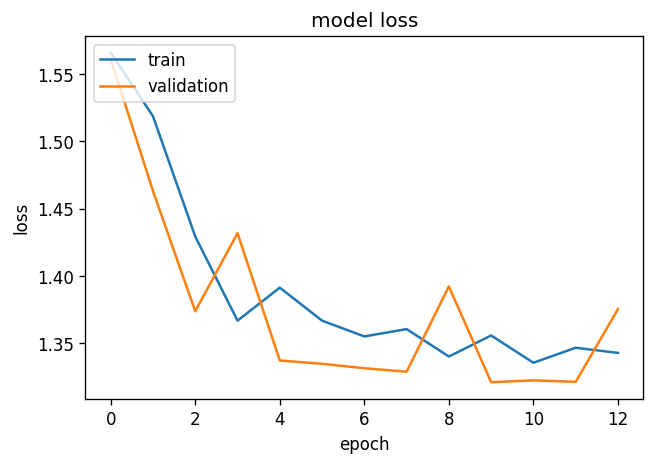

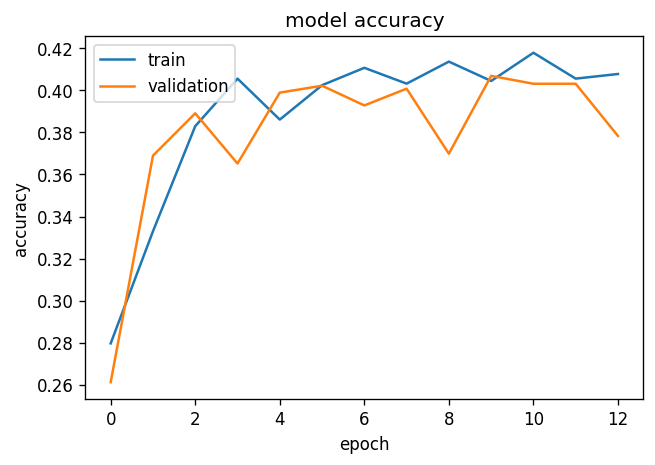

In [17]:
import matplotlib.pyplot as plt

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2),'%')
plt.figure(dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(dpi=120)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Iterative Approach

In [9]:
from experiment_tools_SA import MyGridSearch

betas1 = [2]#np.linspace(0.1,2,5)
betas2 = [2]#np.linspace(0.5,5,5)
nums_cols = [3,5,7,9]
# alphas = [0.5,0.75,0.9]#np.linspace(0.25,0.98,5)

params_dict = {
                'beta1':betas1,
                'beta2':betas2,
                'n_cols':nums_cols
                # 'alpha':alphas
                }


df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')
df.rename(columns={'clean text':'text'},inplace=True)
w2v_model = Word2Vec.load("models/movies_w2v_100.model")

hyperparams_dict = {'emb_model': w2v_model,
                    'df': df,
                    'n_clases': 5}

gs = MyGridSearch(param_dict=params_dict,hyper_params_dict=hyperparams_dict)


Number of combinations to try 4


In [10]:
best_params = gs.fit()

Trying combination {'beta1': 2, 'beta2': 2, 'n_cols': 3, 'top_n': 100, 'alpha': 0.9}


/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

67/67 [==============================] - 0s 2ms/step - loss: 1.3347 - accuracy: 0.3952
Best combination so far: {'beta1': 2, 'beta2': 2, 'n_cols': 3, 'top_n': 100, 'alpha': 0.9}
Accuracy:0.39521801471710205
Trying combination {'beta1': 2, 'beta2': 2, 'n_cols': 5, 'top_n': 100, 'alpha': 0.9}


/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

67/67 [==============================] - 0s 3ms/step - loss: 1.2910 - accuracy: 0.4149
Best combination so far: {'beta1': 2, 'beta2': 2, 'n_cols': 5, 'top_n': 100, 'alpha': 0.9}
Accuracy:0.41490858793258667
Trying combination {'beta1': 2, 'beta2': 2, 'n_cols': 7, 'top_n': 100, 'alpha': 0.9}


/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

67/67 [==============================] - 0s 3ms/step - loss: 1.2909 - accuracy: 0.4196
Best combination so far: {'beta1': 2, 'beta2': 2, 'n_cols': 7, 'top_n': 100, 'alpha': 0.9}
Accuracy:0.4195968210697174
Trying combination {'beta1': 2, 'beta2': 2, 'n_cols': 9, 'top_n': 100, 'alpha': 0.9}


/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_tr_df = labels_tr_df.append(temp_tr_df,ignore_index=True)
/home/wini/Repositorios/SMS-experimentos-PostCue/SentimentKW.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

67/67 [==============================] - 0s 4ms/step - loss: 1.2939 - accuracy: 0.4102


In [12]:
print(gs.best_params_dict)
print(gs.best_accuracy)

{'beta1': 2, 'beta2': 2, 'n_cols': 7, 'top_n': 100, 'alpha': 0.9}
0.4195968210697174


In [ ]:
from SentimentKW import KW

df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')
df['Normalized Label'] = (1/2)*df['Sentiment'].values-1

ake = KW(df=df,text_col_name="clean text",label_col_name="Normalized Label")

kw_dict = ake.get_kw(topn=50)

In [3]:
import pandas as pd
import numpy as np
import pickle
from gensim.models import Word2Vec

df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')
df.rename(columns={'clean text':'text'},inplace=True)
y = df['Sentiment'].values

w2v_model = Word2Vec.load("models/movies_w2v_100.model")

# with open('data/auto_kw_wine.pickle', 'rb') as handle:
#     kw_dict = pickle.load(handle)

iterate = Iterador(kw_dict=kw_dict,
                    emb_model=w2v_model,
                    df = df,
                    n_clases=5)

In [4]:
n_iter = 5

losses, accs = iterate.iterar(alpha=0.95,
                                beta1=1,
                                beta2=1,
                                n_cols=9,
                                n_iter=n_iter)

2022-09-28 11:04:08.508459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


67/67 [==============================] - 0s 4ms/step - loss: 1.3562 - accuracy: 0.3933
1/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3743 - accuracy: 0.3722
2/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3020 - accuracy: 0.4051
3/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3536 - accuracy: 0.3797
4/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3023 - accuracy: 0.4065
5/5 done...


In [5]:
print(f"Best accuracy: {np.max(accs)}")
print(f"Best loss: {np.min(losses)}")

Best accuracy: 0.40646976232528687
Best loss: 1.3020257949829102


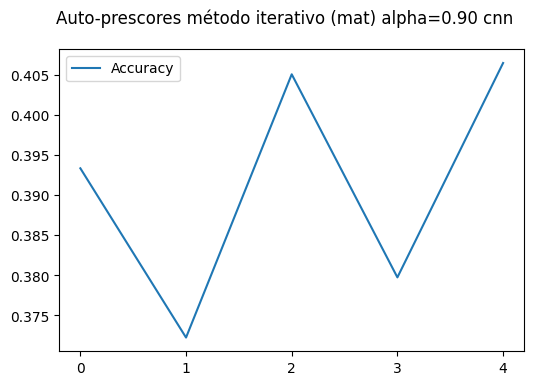

In [6]:
import matplotlib.pyplot as plt

title = "Auto-prescores método iterativo (mat) alpha=0.90 cnn"

plt.figure(dpi=100)
plt.suptitle(title)
plt.plot(range(n_iter),accs,label='Accuracy')
plt.xticks([k for k in range(n_iter)])
plt.legend(loc='best')
plt.savefig(title+".png")
plt.show()
